# Section 5

# 3) Finding groups automatically with k-means clustering

In [1]:
# How k-means does clustering
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn import datasets

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [3]:
# iris = pd.DataFrame(iris.data)
iris_t = pd.DataFrame(y)

In [6]:
model = KMeans(n_clusters=3)

In [7]:
model.fit(X)
labels = model.labels_

In [8]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [9]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [13]:
print(Axes3D)

<class 'mpl_toolkits.mplot3d.axes3d.Axes3D'>


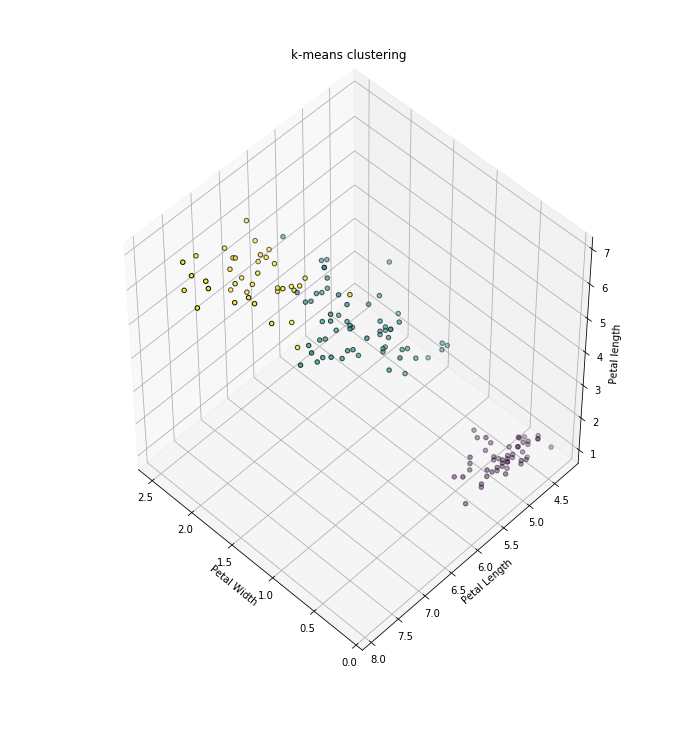

In [10]:
fig = plt.figure(1, figsize=(10, 10))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

ax.scatter(X[:, 3], X[:, 0,], X[:, 2],
          c=labels.astype(np.float), edgecolor='k')

ax.set_xlabel('Petal Width')
ax.set_ylabel('Petal Length')
ax.set_zlabel('Petal length')

ax.set_title('k-means clustering')

ax.dist = 12
plt.show()

# 4) Reducing the number of variables in our data with PCA

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)

In [ ]:
X_pca

In [ ]:
from pprint import pprint as _p
for pc in pca.components_:
    _p(list(zip(iris.feature_names, pc)))
    print('')

In [ ]:
pca.explained_variance_ratio_

# 5) Smoothing out our historgrams with kernel density estimation

In [ ]:
from sklearn.neighbors import KernelDensity

In [ ]:
# sepal width (cm)
feature = X[:, 1]

In [ ]:
plt.hist(feature, bins=30, normed=True)
plt.show()

In [ ]:
plot_space = np.linspace(min(feature), max(feature), 1000)

In [ ]:
kde = KernelDensity(bandwidth=0.05, kernel='gaussian')
kde.fit(feature.reshape(-1, 1))
densities = np.exp(kde.score_samples(plot_space.reshape(-1, 1)))

In [ ]:
plt.bar(plot_space, densities)
plt.ylim(min(densities)-1, max(densities) + 1)
plt.show()